In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#loading the data
fs = pd.read_csv('/Users/ceciliabarnes/Documents/INFO 370/fatherson.csv', delim_whitespace=True)
fs

,fheight,sheight
0,165.2,151.8
1,160.7,160.6
2,165.0,160.9
3,167.0,159.5
4,155.3,163.3
...,...,...
1073,170.2,179.7
1074,181.2,173.4
1075,182.3,176.0
1076,179.7,176.0


In [4]:
fs.shape

(1078, 2)

In [6]:
fs.isnull().sum()

fheight    0
sheight    0
dtype: int64

### 1. 
There are two columns, father and son height, and 1077 rows of data and no null values in either column.

In [7]:
father = fs.fheight
son = fs.sheight

In [14]:
# getting basic stats for fathers
father.mean(), father.median(), father.std(), father.min(), father.max()

(171.92523191094622, 172.1, 6.972345805242013, 149.9, 191.6)

In [18]:
# getting basic stats for sons
son.mean(), son.median(), son.std(), son.min(), son.max()

(174.45723562152145, 174.3, 7.150713294127493, 148.6, 199.0)

### 2. 
Based on these figures, the son's are taller. They have a higher mean, median, and max.

In [66]:
son.mean() - father.mean() # computing mean difference

2.532003710575225

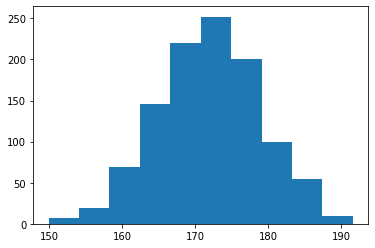

In [22]:
# histogram of father's heights
_ = plt.hist(father)

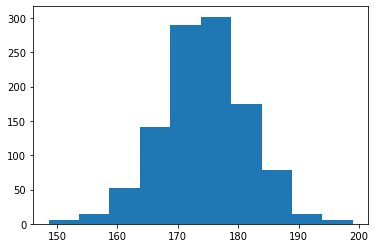

In [23]:
# histogram of son's heights
_ = plt.hist(son)

### 3. 
Both the father and the son histograms resemble a normal distribution, while the father's histogram is a little bit more distributed than the son's histogram which is narrower and taller in the middle.

### 4.

In [34]:
# h0: there is no real difference between fathers and sons
f_and_s = pd.concat([father, son]) # combining son and father data
mean = f_and_s.mean() # getting mean of combined data
std = f_and_s.std() # getting std of combined data

### 5.

In [31]:
# simulated fathers and sons
# use same mean and std because the claim is that they have equal means 
# --> comes from our null hypothesis
simF = np.random.normal(mean, std, size=1077) # simulating fathers
simS = np.random.normal(mean, std, size=1077) # simulating sons
(simF.mean(), simS.mean()) # printing out mean of simulated father and son

(173.17373897925947, 173.47288120005368)

In [35]:
# getting the difference in average simulated father and son
simF.mean() - simS.mean()

-0.2991422207942094

In [36]:
# the difference in the simulated mean, .299, is much smaller than the difference in the true data's mean, 2.53/

### 6.

In [39]:
R = 1000 # setting number of repetitions
diffs = np.empty(1000) # making empty array to hold mean differences
for i in range(R):
    simF = np.random.normal(mean, std, size=1077) # simulating fathers
    simS = np.random.normal(mean, std, size=1077) # simulating sons
    diffs[i] = simF.mean() - simS.mean() # adding the mean difference to the array
diffs

array([ 6.10480496e-01, -3.25979342e-01, -1.44446000e-01,  1.98067386e-02,
        3.24376571e-01,  1.09627745e-02,  1.17191698e-01,  3.15749667e-02,
        8.63555805e-02, -3.95029972e-01, -7.71670737e-03, -4.46641823e-01,
       -2.16652896e-02, -8.05643130e-02, -1.20206784e-01,  2.01281622e-01,
        1.86048960e-01,  4.10422293e-01, -2.24833001e-01,  7.48836261e-02,
       -4.80213021e-01,  3.88264023e-02,  1.06851240e-01, -3.48450794e-01,
       -1.00750537e-01, -2.88951491e-01, -1.42136398e-01, -7.90116349e-02,
        3.18475468e-02, -6.75374849e-02, -1.05005828e-01,  4.03420500e-02,
        1.76885178e-01, -2.37889337e-01,  5.38314103e-01, -5.22641092e-02,
        4.33410467e-02, -2.82909298e-01, -6.34749410e-01, -2.31723839e-01,
        2.08872642e-01, -1.50615158e-01, -8.89994241e-02, -7.10130494e-02,
       -1.56514923e-03,  2.91071484e-01, -3.28215921e-01,  1.47356183e-01,
        6.52079414e-01, -7.14825587e-02,  4.52453879e-03, -3.09560456e-01,
       -1.97949948e-01, -

### 7.

In [40]:
diffs.mean()

0.00964048965967234

The mean of the mean differences is close to 0 because of the Central Limit Theorem.

### 8.

In [41]:
# getting largest mean difference in the sample
np.abs(diffs.max())

0.8938421754755836

The largest mean difference in absolute value in the sample is .89.

### 9.

In [42]:
np.percentile(diffs, [2.5,97.5])

array([-0.56217939,  0.60882722])

2.53 cm in favor of sons does not fall into the CI of [-.56, .60], in fact, it falls way outside of the CI.

### 10. 
The upper limit is over 4 times smaller than the mean difference, showing that the, so we will reject the hypothesis as the claim that there is no difference between father and son height is not consistent with our data. Sons are really taller than fathers.

## Now repeat with t-test
### 1.

In [58]:
SE = np.sqrt((6.97**2 / 1077) + (7.15**2 / 1077)) 
SE

0.3042615915016852

### 2.
alpha = .05\
degrees of freedom = n - 1 = 1076 = inf

In [67]:
mean = son.mean() - father.mean()
mean

2.532003710575225

In [64]:
# getting lower and upper bound
lower = mean - 1.96 * SE
upper = mean + 1.96 * SE

In [65]:
# confidence interval
lower, upper

(1.935650991231922, 3.1283564299185276)

### 3.
We will reject the hypothesis at the 5% confidence level because a mean difference of 0 does not fall within the CI which means it is unlikely that we will see no difference in our real data.

### 4.

In [69]:
t = mean / SE
t

8.321798680137388

### 5.
Looking at the t-table, if 8.32 were to be on it, it would be at a very very low confidence level given that our degrees of freedom are at infinity. This means it is fairly unlikely this t-value would happen by random chance.

### 6.
My conclusion is that fathers are not taller than sons. All three methods were consistent with each other.